<a href="https://colab.research.google.com/github/PozzOver13/learning/blob/main/polars/20231110_tutorial_polars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polars Tutorial 🐻




# References
https://realpython.com/polars-python/  
https://www.pola.rs/  
https://pola-rs.github.io/polars/user-guide/  
https://www.kaggle.com/code/skalskip/pandas-vs-polars-eda  
https://wesmckinney.com/blog/apache-arrow-pandas-internals/  
https://www.youtube.com/watch?v=LGAHTp4DYZY  
https://www.youtube.com/watch?v=CtkMzCIXOWk  Thomas Bierhance: Polars - make the switch to lightning-fast dataframes 🟢


# Introduction

## What is Polars?

Polars is a fast and efficient DataFrame library for the Python programming language. It is designed to provide high-performance data manipulation and analysis capabilities similar to those offered by popular libraries like Pandas, but with a focus on speed and parallel processing.

Key features of Polars include:
1. **Performance**: Polars is built with performance in mind and is optimized for speed. It aims to provide faster data processing compared to Pandas, especially for large datasets.
1. **Lazy Evaluation**: Polars uses lazy evaluation, which means that operations are not immediately executed. Instead, they are recorded as a query plan, allowing for optimization and efficient execution of operations.
1. **Parallel Processing**: Polars is designed to take advantage of parallel processing and multicore systems, which can significantly speed up data manipulation tasks.
1. **Memory Efficiency**: Polars is optimized for memory efficiency, allowing users to work with large datasets without running into memory constraints.
1. **Expressive API**: Polars provides a concise and expressive API for working with data, making it easy to perform common data manipulation tasks.
1. **Integration with Arrow**: Polars leverages the Apache Arrow project for efficient in-memory columnar data representation, enabling seamless interoperability with other systems and libraries that support Arrow.

## What is Rust?

Rust is a programming language that is focused on providing performance, reliability, and safety. It was designed by Mozilla and first announced in 2010. Rust is often praised for its memory safety guarantees, zero-cost abstractions, and strong type system. It is intended for systems-level programming where low-level control over system resources and high performance are crucial.

Key features of Rust include:

1. **Memory Safety:** Rust uses a system of ownership, borrowing, and lifetimes to enforce memory safety without the need for a garbage collector. This helps prevent common programming errors like null pointer dereferencing and data races.
2. **Concurrency without Data Races:** Rust has a concurrency model that allows for safe and concurrent programming by avoiding data races. The ownership system helps prevent multiple threads from accessing the same data simultaneously, reducing the likelihood of bugs related to parallelism.
3. **Zero-Cost Abstractions:** Rust provides high-level abstractions without sacrificing performance. The language aims to eliminate the trade-off between high-level programming constructs and low-level control over system resources.
4. **Cargo Build System:** Rust comes with a build tool called Cargo, which makes it easy to manage dependencies, build projects, and run tests. Cargo simplifies the process of creating, building, and distributing Rust projects.
5. **Pattern Matching:** Rust includes a powerful pattern matching system that makes it expressive and allows for concise and readable code.
6. **C and C++ Interoperability:** Rust can be integrated with existing C and C++ codebases, allowing for gradual adoption or collaboration with projects written in these languages.
7. **Community and Ecosystem:** Rust has a growing and active community, and it is supported by a rich ecosystem of libraries and tools. The community values documentation, and Rust projects often come with well-documented code.

Rust has gained popularity for its focus on safety and performance, making it suitable for a wide range of applications, including system-level programming, embedded systems, and performance-critical applications. It is often used in projects where both low-level control and modern language features are important.

## Why it is worth to know it?

**Philosophy**  
The goal of Polars is to provide a lightning fast DataFrame library that:



1.   Utilizes all available cores on your machine.
1.   Optimizes queries to reduce unneeded work/memory allocations.
1.   Handles datasets much larger than your available RAM.
1.   Has an API that is consistent and predictable.
1. Has a strict schema (data-types should be known before running the query).
1. Polars is written in Rust which gives it C/C++ performance and allows it to fully control performance critical parts in a query engine.

As such Polars goes to great lengths to:

1. Reduce redundant copies.
1. Traverse memory cache efficiently.
1. Minimize contention in parallelism.
1. Process data in chunks.
1. Reuse memory allocations.

**7 verbs get most jobs done (who's thinking to Dplyr?)**


```python
# select / slice columns
select
# create / transform / assign columns
with_columns
# filter / slice / query rows
filter
# join / merge another dataframe
join
# group dataframe rows
groupby
# aggregate groups
agg
# sort dataframe
sort
```


## Pandas Alternatives?

1. **Pandas:**
   - **Overview:** Pandas is one of the most widely used data manipulation libraries in Python. It provides high-performance, easy-to-use data structures such as DataFrames for data analysis and manipulation.
   - **Strengths:** Great for exploratory data analysis, cleaning, and transformation. It has a large and active community.
   - **Considerations:** While Pandas is powerful, it might struggle with very large datasets due to its in-memory nature.

2. **Apache Arrow:**
   - **Overview:** Apache Arrow is a cross-language development platform for in-memory data that specifies a standardized language-independent columnar memory format for flat and hierarchical data.
   - **Strengths:** Efficient in-memory representation, supports multiple languages, and facilitates high-speed data interchange.
   - **Considerations:** While Arrow is crucial for interoperability, it doesn't provide the full range of data manipulation operations found in libraries like Pandas.

3. **Dask:**
   - **Overview:** Dask is a parallel computing library that integrates with existing Python libraries like NumPy, Pandas, and Scikit-Learn to enable parallel processing for larger-than-memory computations.
   - **Strengths:** Scales from a laptop to a cluster, enabling parallel and distributed computing. It's particularly useful for handling larger-than-memory datasets.
   - **Considerations:** Dask integrates with Pandas, but it doesn't replace Pandas; it extends its capabilities to larger datasets.

Other alternatives you might want to explore include:

4. **Vaex:**
   - **Overview:** Vaex is a Python library for lazy, out-of-core DataFrames. It aims to provide a Pandas-like API but with the ability to work with datasets larger than memory.
   - **Strengths:** Designed for handling larger-than-memory datasets, lazy evaluation for efficiency, and fast performance.

5. **Modin:**
   - **Overview:** Modin is a library that seeks to accelerate Pandas workflows by providing parallel and distributed computing capabilities.
   - **Strengths:** It allows you to scale your Pandas workflows using Dask or Ray, providing increased performance for some operations.


## Vectorized and Columnar processing

**Vectorization** refers to the practice of applying operations to entire arrays (vectors) of data at once, rather than performing operations element-wise. In a vectorized approach, operations are executed in parallel on entire columns or arrays, which can significantly improve computational efficiency. This is in contrast to traditional scalar processing, where operations are applied element by element.

In the context of data manipulation libraries:

- **Pandas (Row-Based Processing):** Pandas traditionally operates row-wise. Many Pandas operations involve iterating over rows of a DataFrame, which can be less efficient for certain types of computations, especially on large datasets. This is because iterating over rows doesn't take full advantage of modern CPU architectures optimized for vectorized operations. [⚠️ NEED VERIFICATION ⚠️]

- **Polars (Columnar Processing):** Polars, on the other hand, adopts a columnar processing approach. It organizes data internally in a columnar format, meaning that each column is stored separately in memory. This allows operations to be applied to entire columns at once, taking advantage of vectorized processing and providing better performance, especially for tasks like filtering, aggregating, and transforming data.

**Columnar Processing** involves storing and processing data by column rather than by row. Each column is stored as a contiguous block in memory, which can improve cache locality and reduce the amount of data that needs to be loaded into memory for a particular operation.

In a columnar storage format:

- **Pandas (Row-Based Storage):** Pandas typically stores data in a row-wise format, where each row is stored as a contiguous block. While this format is intuitive for many users, it may not be as cache-friendly or efficient for certain types of operations compared to columnar storage.

- **Polars (Columnar Storage):** Polars, being designed for columnar processing, stores data in a column-wise format. This can lead to more efficient memory access patterns, especially when performing operations that involve entire columns, as only the relevant columns need to be loaded into memory.

**Key Differences**:

1. **Memory Access Patterns:** Columnar processing is often more efficient for certain types of operations because it minimizes the amount of data that needs to be loaded into memory for a given computation.

2. **Parallelism:** Columnar processing facilitates better parallelism, as operations can be performed independently on each column, taking advantage of vectorized instructions in modern CPUs.

3. **Performance on Large Datasets:** Columnar processing can offer better performance for certain operations, especially on large datasets, due to improved cache efficiency and parallelism.



## Use Case Ideas
1. Provare a sostituire una parte di Financial Forecast con le espressioni di Polar

# Pandas🐼 vs Polars🐻

In [1]:
!python --version

Python 3.10.12


In [ ]:
!pip install polars==0.19

## Importing libraries

In [2]:
import pandas as pd
import polars as pl
import numpy as np

import polars.selectors as cs

# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
TRAIN_CSV_PATH = "/content/drive/MyDrive/Personale/Dataset/finance_loan_approval/train.csv"
TEST_CSV_PATH = "/content/drive/MyDrive/Personale/Dataset/finance_loan_approval/test.csv"

## Reading Files

https://pola-rs.github.io/polars/user-guide/basics/reading-writing/

In [38]:
# Read the CSV file into a pandas DataFrame
train_pd = pd.read_csv(TRAIN_CSV_PATH)
train_pl = pl.read_csv(TRAIN_CSV_PATH, infer_schema_length=10000) # without infer_schema_length generates an error interpreting a column as i64 instead of float

## Types & Memory Usage

Polars is entirely based on Arrow data types and backed by Arrow memory arrays. This makes data processing cache-efficient and well-supported for Inter Process Communication. Most data types follow the exact implementation from Arrow, with the exception of Utf8 (this is actually LargeUtf8), Categorical, and Object (support is limited).  
https://pola-rs.github.io/polars/user-guide/concepts/data-types/  

https://pola-rs.github.io/polars/user-guide/concepts/data-structures/

### is there an equivalent of pandas "memory_usage" method  in polars?

As of my last knowledge update in January 2022, Polars does not have an exact equivalent method to Pandas' `memory_usage` for directly calculating the memory usage of a DataFrame. However, you can achieve similar results by using other approaches.

In Pandas, the `memory_usage` method provides information about the memory usage of each column in a DataFrame. Polars, being designed for efficient memory usage, may not expose a direct method for this purpose. However, you can estimate memory usage in Polars using alternative methods:

1. **Using the `memory_usage()` Method in Pandas:**
   If you have a Polars DataFrame and want to estimate memory usage, you can convert it to a Pandas DataFrame temporarily and use the Pandas `memory_usage` method. Here's an example:

   ```python
   import pandas as pd
   import polars as pl

   # Create a Polars DataFrame
   polars_df = pl.DataFrame({
       'A': [1, 2, 3],
       'B': ['foo', 'bar', 'baz']
   })

   # Convert to Pandas DataFrame and use memory_usage
   pandas_df = polars_df.to_pandas()
   memory_usage = pandas_df.memory_usage(deep=True)
   print(memory_usage)
   ```

   Note that the `deep=True` argument in `memory_usage` considers the memory usage of the underlying objects, which can be more accurate but also more computationally expensive.

2. **Estimating Memory Usage in Polars:**
   While there may not be a dedicated method for memory usage in Polars, you can get an estimate of the size of a DataFrame using the `arrow_memory_size` method. This method returns the size of a `RecordBatch` in bytes. While it's not an exact memory usage for the DataFrame, it can give you an idea of the memory footprint.

   ```python
   import polars as pl

   # Create a Polars DataFrame
   polars_df = pl.DataFrame({
       'A': [1, 2, 3],
       'B': ['foo', 'bar', 'baz']
   })

   # Get an estimate of the memory usage
   memory_size_estimate = polars_df.arrow_memory_size()
   print(f"Estimated memory usage: {memory_size_estimate} bytes")
   ```

   Keep in mind that these approaches provide estimates, and the actual memory usage may depend on various factors, including the data types of the columns and other internal optimizations performed by the library. Always consider the specific requirements of your use case when estimating memory usage. Additionally, check the Polars documentation for any updates or new methods related to memory usage that may have been introduced after my last knowledge update.

### schemas

In [5]:
train_pl.schema

{'Loan_ID': Utf8,
 'Gender': Utf8,
 'Married': Utf8,
 'Dependents': Utf8,
 'Education': Utf8,
 'Self_Employed': Utf8,
 'ApplicantIncome': Int64,
 'CoapplicantIncome': Float64,
 'LoanAmount': Int64,
 'Loan_Amount_Term': Int64,
 'Credit_History': Int64,
 'Property_Area': Utf8,
 'Loan_Status': Utf8}

In [6]:
train_pd.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
def print_memory_usage(df):
    mem_MB = df.memory_usage(index=True, deep=True).sum() / 1024 / 1024
    print(f"memory used: {mem_MB:.1f} MB")
    # return df

In [8]:
print_memory_usage(train_pd)

memory used: 0.3 MB


In [9]:
# using the previous steps to extract the schema
dset_schema = train_pl.schema
train_pl = pl.read_csv(TRAIN_CSV_PATH, dtypes=dset_schema)

## Heading

In [10]:
train_pd.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [11]:
train_pl.head(3)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001002""","""Male""","""No""","""0""","""Graduate""","""No""",5849,0.0,null,360,1,"""Urban""","""Y"""
"""LP001003""","""Male""","""Yes""","""1""","""Graduate""","""No""",4583,1508.0,128,360,1,"""Rural""","""N"""
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y"""


## Unique Values

**Count unique values**
There are two ways to count unique values in Polars: an exact methodology and an approximation. The approximation uses the HyperLogLog++ algorithm to approximate the cardinality and is especially useful for very large datasets where an approximation is good enough.

https://pola-rs.github.io/polars/user-guide/expressions/functions/#count-unique-values

In [12]:
print('Gender', train_pd['Gender'].nunique())
print('Married', train_pd['Married'].nunique())
print('Property_Area', train_pd['Property_Area'].nunique())

Gender 2
Married 2
Property_Area 3


In [13]:
print('Gender', train_pl['Gender'].n_unique())
print('Married', train_pl['Married'].n_unique())
print('Property_Area', train_pl['Property_Area'].n_unique())

Gender 3
Married 3
Property_Area 3


In [14]:
train_pd['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [15]:
train_pl['Gender'].unique() # in polars i valori missing sono considerati valori oppure e' una questione di lettura?

Gender
str
"""Female"""
null
"""Male"""


In [16]:
train_pd['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [17]:
train_pl['Property_Area'].unique()

Property_Area
str
"""Urban"""
"""Semiurban"""
"""Rural"""


## Expressions

### Select

In [23]:
train_pl.select(pl.col("*")).limit(3) # equivalent to df.select(pl.all())

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001002""","""Male""","""No""","""0""","""Graduate""","""No""",5849,0.0,null,360,1,"""Urban""","""Y"""
"""LP001003""","""Male""","""Yes""","""1""","""Graduate""","""No""",4583,1508.0,128,360,1,"""Rural""","""N"""
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y"""


In [24]:
train_pl.select(pl.col("Gender",	"Married")).limit(3)

Gender,Married
str,str
"""Male""","""No"""
"""Male""","""Yes"""
"""Male""","""Yes"""


In [25]:
train_pl.select(pl.exclude("Gender",	"Married")).limit(3)

Loan_ID,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001002""","""0""","""Graduate""","""No""",5849,0.0,null,360,1,"""Urban""","""Y"""
"""LP001003""","""1""","""Graduate""","""No""",4583,1508.0,128,360,1,"""Rural""","""N"""
"""LP001005""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y"""


In [73]:
train_pl.select(cs.matches("*[A-a]pplicant")).limit(3) # matches works with regex

ApplicantIncome,CoapplicantIncome
i64,f64
5849,0.0
4583,1508.0
3000,0.0


In [78]:
train_pl.select(cs.contains("Income"), cs.contains("_")).limit(3)

ApplicantIncome,CoapplicantIncome,Loan_ID,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
i64,f64,str,str,i64,i64,str,str
5849,0.0,"""LP001002""","""No""",360,1,"""Urban""","""Y"""
4583,1508.0,"""LP001003""","""No""",360,1,"""Rural""","""N"""
3000,0.0,"""LP001005""","""Yes""",360,1,"""Urban""","""Y"""


In [51]:
train_pl.select(pl.col(pl.Int64, pl.UInt32, pl.Boolean).n_unique())

ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
u32,u32,u32,u32
505,204,11,3


In [67]:
train_pl.select(cs.string())


Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
str,str,str,str,str,str,str,str
"""LP001002""","""Male""","""No""","""0""","""Graduate""","""No""","""Urban""","""Y"""
"""LP001003""","""Male""","""Yes""","""1""","""Graduate""","""No""","""Rural""","""N"""
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""","""Urban""","""Y"""
"""LP001006""","""Male""","""Yes""","""0""","""Not Graduate""","""No""","""Urban""","""Y"""
"""LP001008""","""Male""","""No""","""0""","""Graduate""","""No""","""Urban""","""Y"""
"""LP001011""","""Male""","""Yes""","""2""","""Graduate""","""Yes""","""Urban""","""Y"""
"""LP001013""","""Male""","""Yes""","""0""","""Not Graduate""","""No""","""Urban""","""Y"""
"""LP001014""","""Male""","""Yes""","""3+""","""Graduate""","""No""","""Semiurban""","""N"""
"""LP001018""","""Male""","""Yes""","""2""","""Graduate""","""No""","""Urban""","""Y"""


### Filter

In [84]:
train_pl.\
    filter(
        pl.col("Gender") == "Female"
        ).\
    limit(3)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001036""","""Female""","""No""","""0""","""Graduate""","""No""",3510,0.0,76,360,0,"""Urban""","""N"""
"""LP001087""","""Female""","""No""","""2""","""Graduate""",null,3750,2083.0,120,360,1,"""Semiurban""","""Y"""
"""LP001112""","""Female""","""Yes""","""0""","""Graduate""","""No""",3667,1459.0,144,360,1,"""Semiurban""","""Y"""


In [26]:
train_pl.filter(
    pl.col("ApplicantIncome").is_between(2000, 4000),
).limit(3)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y"""
"""LP001006""","""Male""","""Yes""","""0""","""Not Graduate""","""No""",2583,2358.0,120,360,1,"""Urban""","""Y"""
"""LP001013""","""Male""","""Yes""","""0""","""Not Graduate""","""No""",2333,1516.0,95,360,1,"""Urban""","""Y"""


In [29]:
# train_pl.filter((pl.col("ApplicantIncome") <= 2000) & (pl.col("Gender").is_not_nan())) # InvalidOperationError: `is_not_nan` operation not supported for dtype `str`
# train_pl.filter((pl.col("ApplicantIncome") <= 2000) & (pl.col("Gender").is_null())) # is_not_null() is needed for string columns
train_pl.filter((pl.col("ApplicantIncome") <= 2000) & (pl.col("Gender").is_null()))

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str
"""LP001644""",null,"""Yes""","""0""","""Graduate""","""Yes""",674,5296.0,168,360,1,"""Rural""","""Y"""


### With columns

In [41]:
# train_pl.with_columns(
#     (pl.col("ApplicantIncome") + pl.col("CoapplicantIncome")).alias("TotalIncome"),
#     (pl.col("ApplicantIncome") / pl.col("TotalIncome")).alias("ApplicantIncome %")
# ).limit(3)

train_pl.\
    with_columns((pl.col("ApplicantIncome") + pl.col("CoapplicantIncome")).alias("TotalIncome")). \
    with_columns((pl.col("ApplicantIncome") / pl.col("TotalIncome")).alias("ApplicantIncome %")).limit(3)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,ApplicantIncome %
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str,f64,f64
"""LP001002""","""Male""","""No""","""0""","""Graduate""","""No""",5849,0.0,null,360,1,"""Urban""","""Y""",5849.0,1.0
"""LP001003""","""Male""","""Yes""","""1""","""Graduate""","""No""",4583,1508.0,128,360,1,"""Rural""","""N""",6091.0,0.752422
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y""",3000.0,1.0


In [90]:
train_pl.\
    select(
        pl.all(),
        pl.col("ApplicantIncome").sum().over("Education").alias("ApplicantIncome_by_education")
    ).\
    limit(3)

Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,ApplicantIncome_by_education
str,str,str,str,str,str,i64,f64,i64,i64,i64,str,str,i64
"""LP001002""","""Male""","""No""","""0""","""Graduate""","""No""",5849,0.0,null,360,1,"""Urban""","""Y""",2811568
"""LP001003""","""Male""","""Yes""","""1""","""Graduate""","""No""",4583,1508.0,128,360,1,"""Rural""","""N""",2811568
"""LP001005""","""Male""","""Yes""","""0""","""Graduate""","""Yes""",3000,0.0,66,360,1,"""Urban""","""Y""",2811568


### Grouping

In [18]:
train_pd.groupby(['Gender', 'Married'], dropna=False).size().to_frame('N').reset_index()

,Gender,Married,N
0,Female,No,80
1,Female,Yes,31
2,Female,NaN,1
3,Male,No,130
4,Male,Yes,357
5,Male,NaN,2
6,NaN,No,3
7,NaN,Yes,10


In [32]:
train_pl.groupby(['Gender', 'Married'], maintain_order=True).count().sort(by='Gender') # unexpected keyword argument 'dropna', object has no attribute 'to_frame'
# non mi sembra ordinato

Gender,Married,count
str,str,u32
null,"""Yes""",10
null,"""No""",3
"""Female""","""No""",80
"""Female""","""Yes""",31
"""Female""",null,1
"""Male""","""No""",130
"""Male""","""Yes""",357
"""Male""",null,2


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status',
 'TotalIncome',
 'Reimbursement']

In [ ]:
median_applicant_income = (
    pl.col("ApplicantIncome")
    .median()
    .alias("median_ApplicantIncome")
)

In [ ]:
median_applicant_income

In [ ]:
n_unique_Loan_ID = (
    pl.col("Loan_ID")
    .n_unique()
    .alias("n_unique_Loan_ID")
)

In [ ]:
train_pl.select(median_applicant_income)

median_ApplicantIncome
f64
3812.5


In [ ]:
train_pl.select(n_unique_Loan_ID)

n_unique_Loan_ID
u32
614


In [ ]:
train_pl.groupby(['Gender']).agg(median_applicant_income, n_unique_Loan_ID)

Gender,median_ApplicantIncome,n_unique_Loan_ID
str,f64,u32
null,3583.0,13
"""Female""",3583.0,112
"""Male""",3865.0,489


## Lazyness

https://pola-rs.github.io/polars/user-guide/concepts/lazy-vs-eager/#when-to-use-which

In [ ]:
train_pl_lz = pl.scan_csv(TRAIN_CSV_PATH, infer_schema_length=10000)

In [ ]:
train_pl_lz.schema

{'Loan_ID': Utf8,
 'Gender': Utf8,
 'Married': Utf8,
 'Dependents': Utf8,
 'Education': Utf8,
 'Self_Employed': Utf8,
 'ApplicantIncome': Int64,
 'CoapplicantIncome': Float64,
 'LoanAmount': Int64,
 'Loan_Amount_Term': Int64,
 'Credit_History': Int64,
 'Property_Area': Utf8,
 'Loan_Status': Utf8}

In [ ]:
buildings.groupby("building_type").agg(
    [
        pl.mean("sqft").alias("mean_sqft"),
        pl.median("year").alias("median_year"),
        pl.count()
        ]
)

building_type,mean_sqft,median_year,count
str,f64,f64,u32
"""C""",1027.330766,2008.0,1661
"""A""",957.051047,2008.0,1695
"""B""",1040.209262,2008.0,1644


In [ ]:
buildings = {
    "sqft": rng.exponential(scale=1000, size=num_rows),
    "price": rng.exponential(scale=100_000, size=num_rows),
    "year": rng.integers(low=1995, high=2023, size=num_rows),
    "building_type": rng.choice(["A", "B", "C"], size=num_rows)
    }

buildings_lazy = pl.LazyFrame(buildings)
buildings_lazy


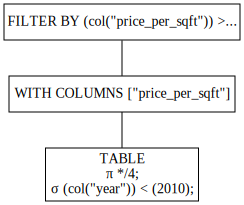

In [ ]:
lazy_query = (
    buildings_lazy
    .with_columns(
        (pl.col("price") / pl.col("sqft")).alias("price_per_sqft")
        )
    .filter(pl.col("price_per_sqft") > 100)
    .filter(pl.col("year") < 2010)
)

lazy_query.show_graph()

In [ ]:
(
    lazy_query
    .collect()
    .select(pl.col(["price_per_sqft", "year"]))
)

price_per_sqft,year
f64,i64
136.367182,2002
43890.679476,2000
172.155402,1996
155.244312,1998
1645.707997,2000
27619.783842,2003
684.047341,1996
200.292347,2007
108.396788,1999


In [ ]:
import requests
import pathlib

def download_file(file_url: str, local_file_path: pathlib.Path) -> None:
    """Download a file and save it with the specified file name."""
    response = requests.get(file_url)
    if response:
        local_file_path.write_bytes(response.content)
        print(f"File successfully downloaded and stored at: {local_file_path}")
    else:
        raise requests.exceptions.RequestException(
            f"Failed to download the file. Status code: {response.status_code}"
        )

In [ ]:
url = "https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD"
local_file_path = pathlib.Path("electric_cars.csv")

download_file(url, local_file_path)

File successfully downloaded and stored at: electric_cars.csv


In [ ]:
lazy_car_data = pl.scan_csv(local_file_path)
lazy_car_data

In [ ]:
lazy_car_data.schema

{'VIN (1-10)': Utf8,
 'County': Utf8,
 'City': Utf8,
 'State': Utf8,
 'Postal Code': Int64,
 'Model Year': Int64,
 'Make': Utf8,
 'Model': Utf8,
 'Electric Vehicle Type': Utf8,
 'Clean Alternative Fuel Vehicle (CAFV) Eligibility': Utf8,
 'Electric Range': Int64,
 'Base MSRP': Int64,
 'Legislative District': Int64,
 'DOL Vehicle ID': Int64,
 'Vehicle Location': Utf8,
 'Electric Utility': Utf8,
 '2020 Census Tract': Int64}

In [ ]:
lazy_car_query = (
    lazy_car_data
    .filter((pl.col("Model Year") >= 2018))
    .filter(
        pl.col("Electric Vehicle Type") == "Battery Electric Vehicle (BEV)"
        )
    .groupby(["State", "Make"])
    .agg(
        pl.mean("Electric Range").alias("Average Electric Range"),
        pl.min("Model Year").alias("Oldest Model Year"),
        pl.count().alias("Number of Cars"),
        )
    .filter(pl.col("Average Electric Range") > 0)
    .filter(pl.col("Number of Cars") > 5)
    .sort(pl.col("Number of Cars"), descending=True)
    )

In [ ]:
lazy_car_query.collect()

State,Make,Average Electric Range,Oldest Model Year,Number of Cars
str,str,f64,i64,u32
"""WA""","""TESLA""",76.215075,2018,63550
"""WA""","""NISSAN""",84.965967,2018,5906
"""WA""","""CHEVROLET""",104.147281,2018,5812
"""WA""","""FORD""",0.128337,2018,3896
"""WA""","""KIA""",54.974002,2018,3808
"""WA""","""VOLKSWAGEN""",18.975013,2018,3722
"""WA""","""HYUNDAI""",20.598614,2018,2885
"""WA""","""AUDI""",79.543316,2019,1743
"""WA""","""BMW""",16.56254,2018,1559
